In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#drop ump3 cuz more than 75% null
df.drop(columns=['umpire3'], inplace=True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
#cities has a few null values and it is categorical so we can use the mode to fill null
df['city'] = df['city'].fillna(df['city'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [ ]:
#repeating the same as cities with winner,player of match
df['winner'] = df['winner'].fillna(df['winner'].mode()[0])
df['player_of_match'] = df['player_of_match'].fillna(df['player_of_match'].mode()[0])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [ ]:
#dropping the rows with null values in umpire1 and umpier 2
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               754 non-null    int64 
 1   season           754 non-null    int64 
 2   city             754 non-null    object
 3   date             754 non-null    object
 4   team1            754 non-null    object
 5   team2            754 non-null    object
 6   toss_winner      754 non-null    object
 7   toss_decision    754 non-null    object
 8   result           754 non-null    object
 9   dl_applied       754 non-null    int64 
 10  winner           754 non-null    object
 11  win_by_runs      754 non-null    int64 
 12  win_by_wickets   754 non-null    int64 
 13  player_of_match  754 non-null    object
 14  venue            754 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usage: 10

In [ ]:
#now we have a clean data set with no null values
#now checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# now we convert date column to datetime handling mixed formats
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               754 non-null    int64         
 1   season           754 non-null    int64         
 2   city             754 non-null    object        
 3   date             754 non-null    datetime64[ns]
 4   team1            754 non-null    object        
 5   team2            754 non-null    object        
 6   toss_winner      754 non-null    object        
 7   toss_decision    754 non-null    object        
 8   result           754 non-null    object        
 9   dl_applied       754 non-null    int64         
 10  winner           754 non-null    object        
 11  win_by_runs      754 non-null    int64         
 12  win_by_wickets   754 non-null    int64         
 13  player_of_match  754 non-null    object        
 14  venue            754 non-null    object        

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [ ]:
#now checking for repeated names or double name thing
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    print(f"{col}: {df[col].unique()}\n")


team1: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']

team2: ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']

winner: ['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Mumbai Indians' 'Delhi Daredevils' 'Gujarat Lions'
 'Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'Rising Pune Supergiants' 'Delhi Capitals']

toss_winner: ['Royal

In [ ]:
df.replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
}, inplace=True)
# Check again to confirm
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    print(f"{col}: {df[col].unique()}\n")

team1: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Capitals' 'Punjab Kings'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']

team2: ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Punjab Kings' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Capitals' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala']

winner: ['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Punjab Kings' 'Mumbai Indians' 'Delhi Capitals' 'Gujarat Lions'
 'Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Pune Warriors' 'Kochi Tuskers Kerala']

toss_winner: ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Punjab Kings' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' '

In [ ]:
#no duplicate rows so next is to check
#getting som basic info
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               754 non-null    int64         
 1   season           754 non-null    int64         
 2   city             754 non-null    object        
 3   date             754 non-null    datetime64[ns]
 4   team1            754 non-null    object        
 5   team2            754 non-null    object        
 6   toss_winner      754 non-null    object        
 7   toss_decision    754 non-null    object        
 8   result           754 non-null    object        
 9   dl_applied       754 non-null    int64         
 10  winner           754 non-null    object        
 11  win_by_runs      754 non-null    int64         
 12  win_by_wickets   754 non-null    int64         
 13  player_of_match  754 non-null    object        
 14  venue            754 non-null    object        

,0
id,0
season,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
#ok now doing univariant analysis
# Count of matches per season
season_counts = df['season'].value_counts().sort_index()
print(season_counts)

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    58
2018    60
2019    59
Name: count, dtype: int64


1) above is the total count of matches per season



/tmp/ipython-input-19-1916249006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


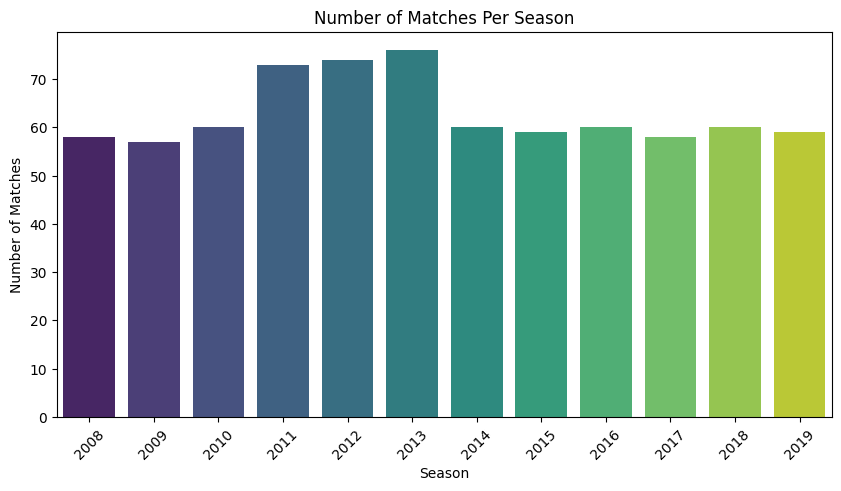

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title('Number of Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

2) we can see that there we more matches in the year 2011,2012 and 2013 than other years.

/tmp/ipython-input-20-909181290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='plasma')


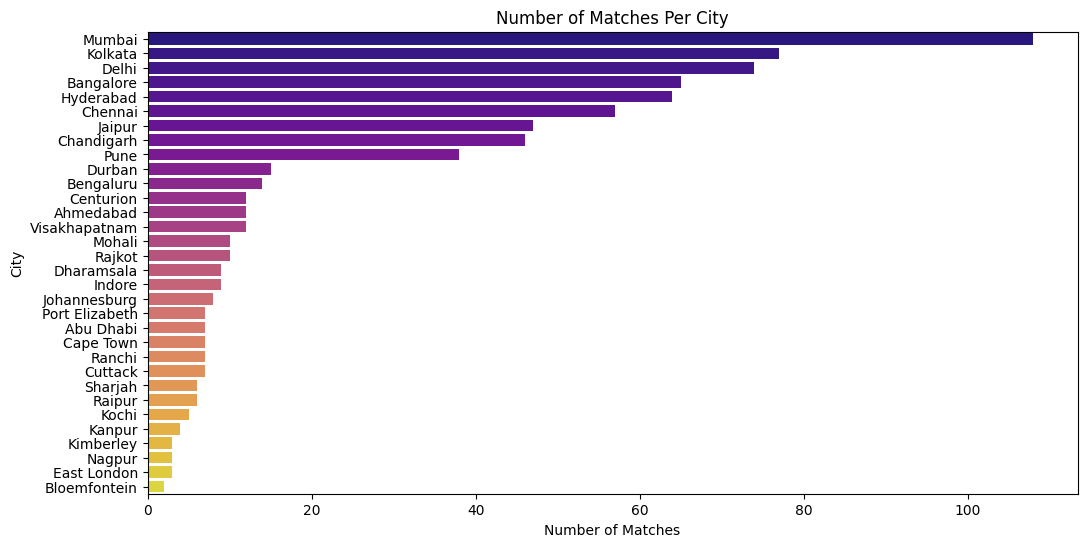

In [ ]:
# Count of matches per city
city_counts = df['city'].value_counts()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(y=city_counts.index, x=city_counts.values, palette='plasma')
plt.title('Number of Matches Per City')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()


3) different locations of the match


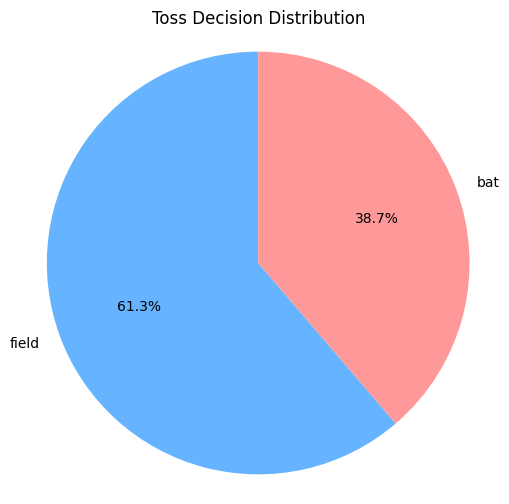

In [ ]:
# Toss decision counts
toss_decision_counts = df['toss_decision'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(toss_decision_counts.values, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Toss Decision Distribution')
plt.axis('equal')
plt.show()

4)above gives the toss decision

/tmp/ipython-input-22-752137599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')


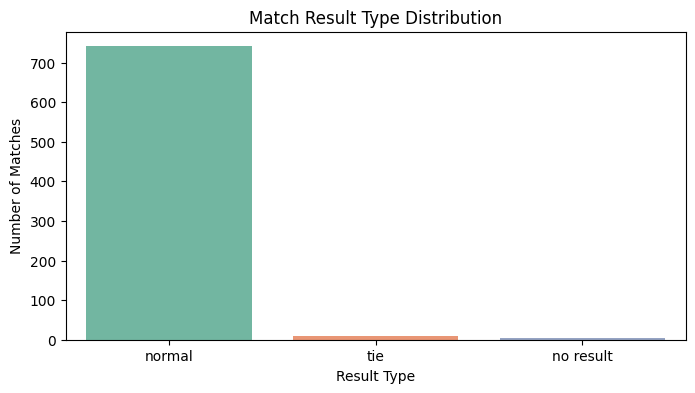

In [ ]:
# Result type counts
result_counts = df['result'].value_counts()

# Bar plot
plt.figure(figsize=(8,4))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')
plt.title('Match Result Type Distribution')
plt.xlabel('Result Type')
plt.ylabel('Number of Matches')
plt.show()

5)different types of match results

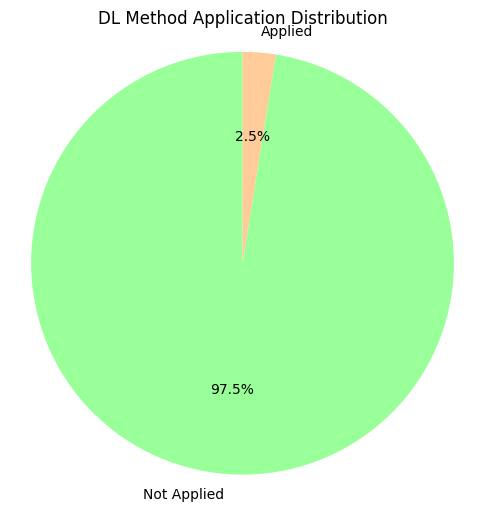

In [ ]:
# Count of matches where DL method applied
dl_counts = df['dl_applied'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(dl_counts.values, labels=['Not Applied', 'Applied'], autopct='%1.1f%%', startangle=90, colors=['#99ff99','#ffcc99'])
plt.title('DL Method Application Distribution')
plt.axis('equal')
plt.show()


6)matches where dl was applyed

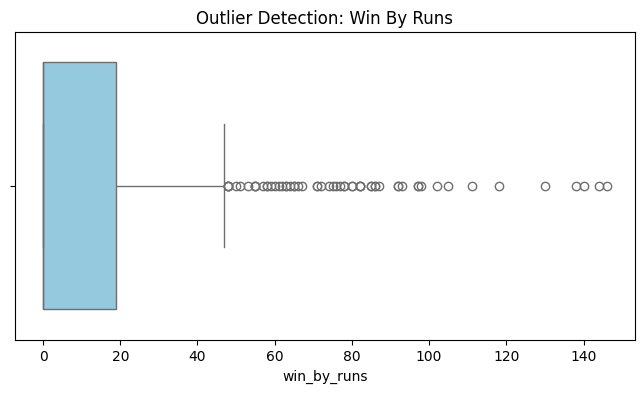

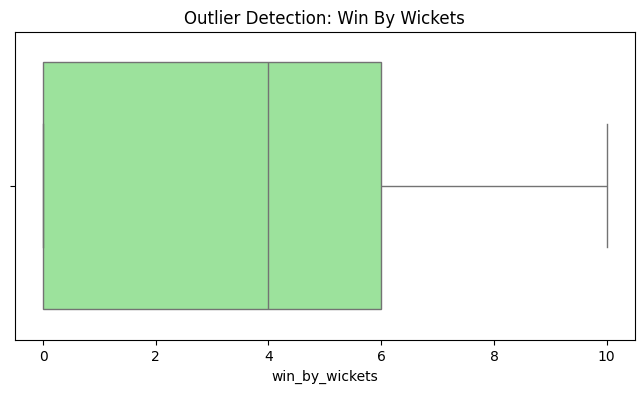

In [ ]:
#ok now proceeding with outlier detection
# Boxplot for win_by_runs
plt.figure(figsize=(8,4))
sns.boxplot(x=df['win_by_runs'], color='skyblue')
plt.title('Outlier Detection: Win By Runs')
plt.show()

# Boxplot for win_by_wickets
plt.figure(figsize=(8,4))
sns.boxplot(x=df['win_by_wickets'], color='lightgreen')
plt.title('Outlier Detection: Win By Wickets')
plt.show()


**insight** :- 7)There were several matches where the winning team dominated by more than 58 runs, with extreme cases touching 140+ runs.

8)Most wins by wickets range from 0 to 7 wickets

In [ ]:
#checking outliers using IRQ method
# Outlier detection for win_by_runs
Q1 = df['win_by_runs'].quantile(0.25)
Q3 = df['win_by_runs'].quantile(0.75)
IQR = Q3 - Q1

outliers_runs = df[(df['win_by_runs'] < (Q1 - 1.5 * IQR)) | (df['win_by_runs'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in win_by_runs:", outliers_runs.shape[0])

# Outlier detection for win_by_wickets
Q1_w = df['win_by_wickets'].quantile(0.25)
Q3_w = df['win_by_wickets'].quantile(0.75)
IQR_w = Q3_w - Q1_w

outliers_wickets = df[(df['win_by_wickets'] < (Q1_w - 1.5 * IQR_w)) | (df['win_by_wickets'] > (Q3_w + 1.5 * IQR_w))]
print("Number of outliers in win_by_wickets:", outliers_wickets.shape[0])


Number of outliers in win_by_runs: 58
Number of outliers in win_by_wickets: 0


In [ ]:
df[df['dl_applied'] == 1]['season'].value_counts()


,count
season,
2016,4
2011,3
2018,3
2009,3
2015,2
2008,2
2017,1
2014,1


9)above are teh insights about the use of dls method across various years


/tmp/ipython-input-27-4072105007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.values, y=win_counts.index, palette='magma')


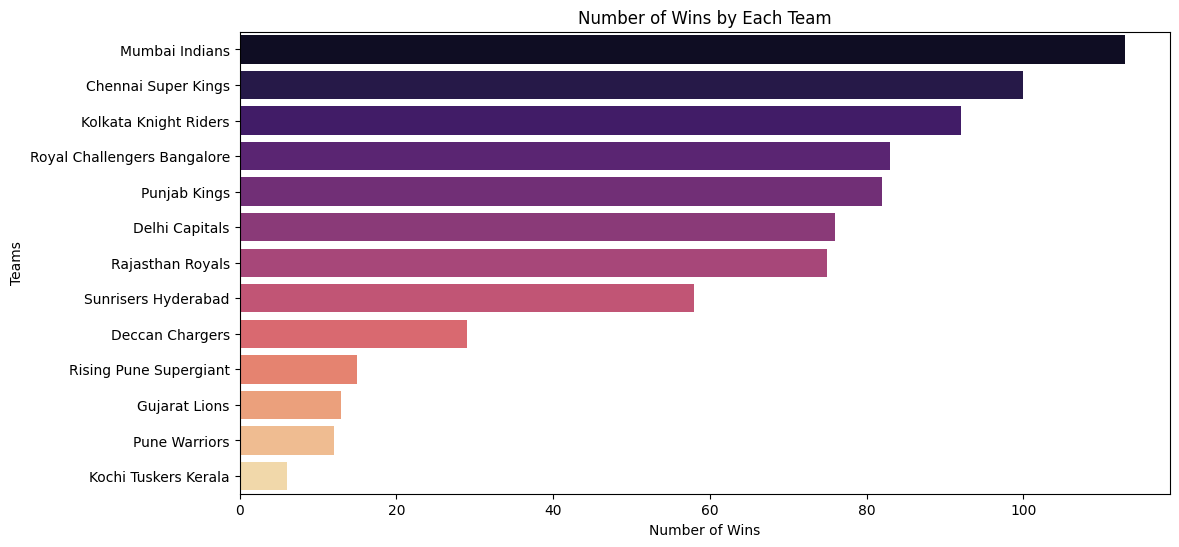

In [ ]:
# Wins per team
win_counts = df['winner'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=win_counts.values, y=win_counts.index, palette='magma')
plt.title('Number of Wins by Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()


10)number of wins per team

/tmp/ipython-input-28-2194291801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_counts.values, y=toss_counts.index, palette='plasma')


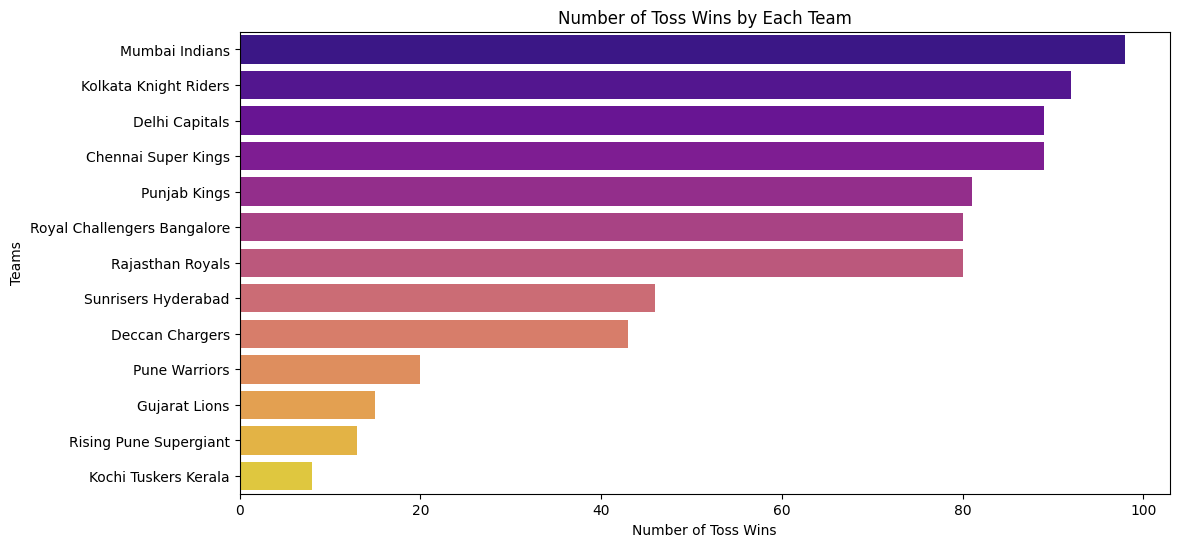

In [ ]:
# Toss wins per team
toss_counts = df['toss_winner'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=toss_counts.values, y=toss_counts.index, palette='plasma')
plt.title('Number of Toss Wins by Each Team')
plt.xlabel('Number of Toss Wins')
plt.ylabel('Teams')
plt.show()


11)number of toss win per team

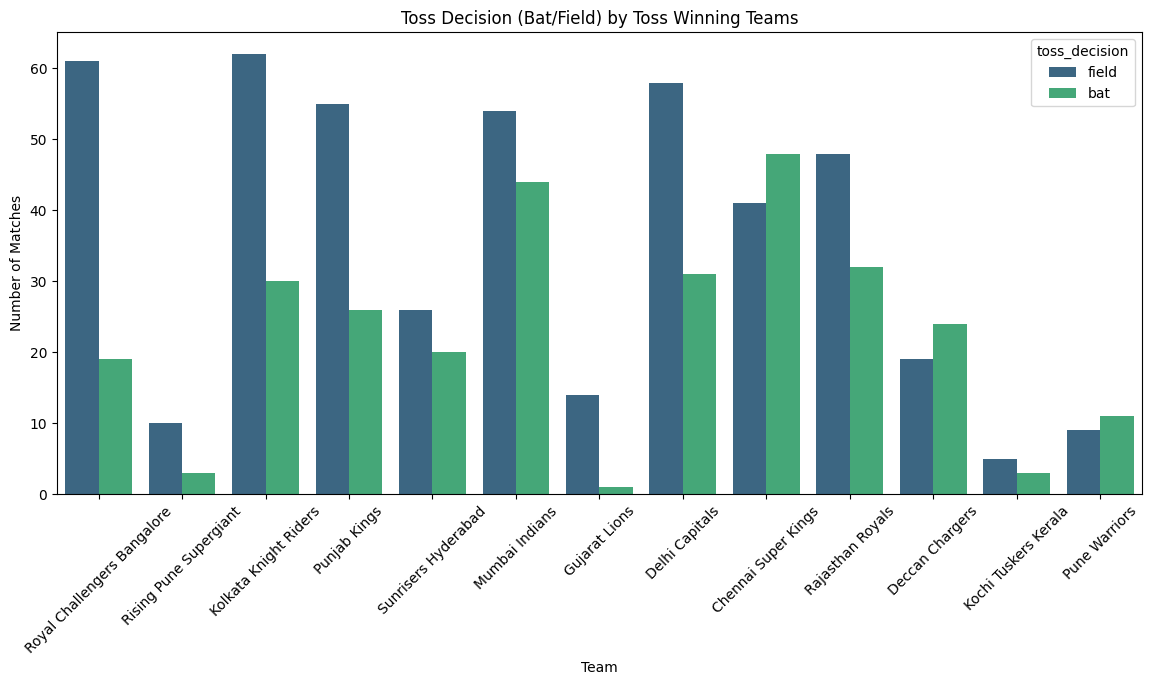

In [ ]:
#toss decision of winre
plt.figure(figsize=(14,6))
sns.countplot(x='toss_winner', hue='toss_decision', data=df, palette='viridis')
plt.title('Toss Decision (Bat/Field) by Toss Winning Teams')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


12)toss decision per team

In [ ]:
#toss vs match winner
# Did toss winner also win match?
toss_match = df[df['toss_winner'] == df['winner']]

# Count
success_count = toss_match.shape[0]
total_matches = df.shape[0]

print(f"Toss winner won the match {success_count} times out of {total_matches} matches.")
print(f"Percentage: {(success_count/total_matches)*100:.2f}%")


Toss winner won the match 391 times out of 754 matches.
Percentage: 51.86%


13) toss vs match win

/tmp/ipython-input-31-3762653608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='coolwarm')


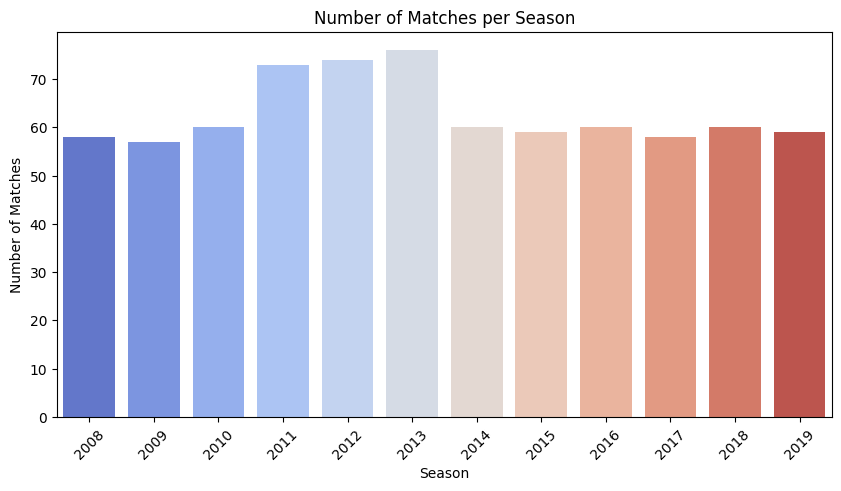

In [ ]:
#no.season vs match
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=df, palette='coolwarm')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


14)no.season vs match

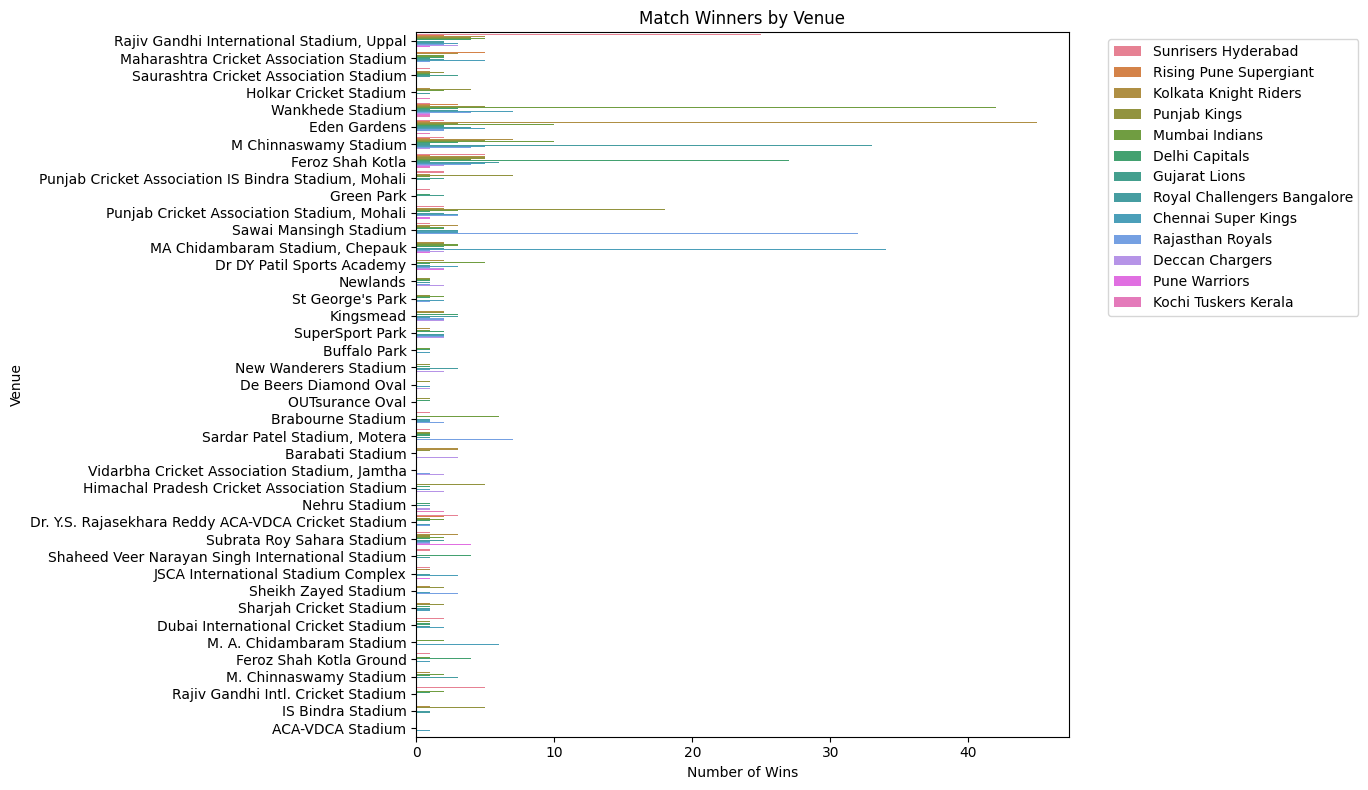

In [ ]:
#venue and win
plt.figure(figsize=(14,8))
sns.countplot(y='venue', hue='winner', data=df)
plt.title('Match Winners by Venue')
plt.xlabel('Number of Wins')
plt.ylabel('Venue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


15)venue and win


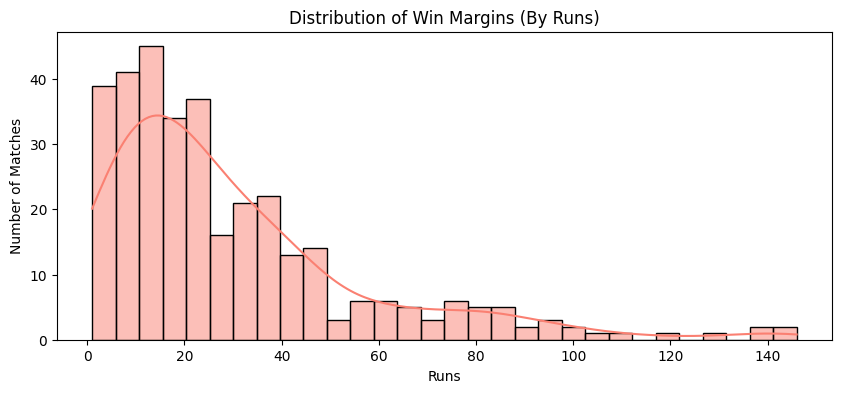

In [ ]:
#win margin by runs
plt.figure(figsize=(10,4))
sns.histplot(df[df['win_by_runs'] > 0]['win_by_runs'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Win Margins (By Runs)')
plt.xlabel('Runs')
plt.ylabel('Number of Matches')
plt.show()


16)win margin by runs


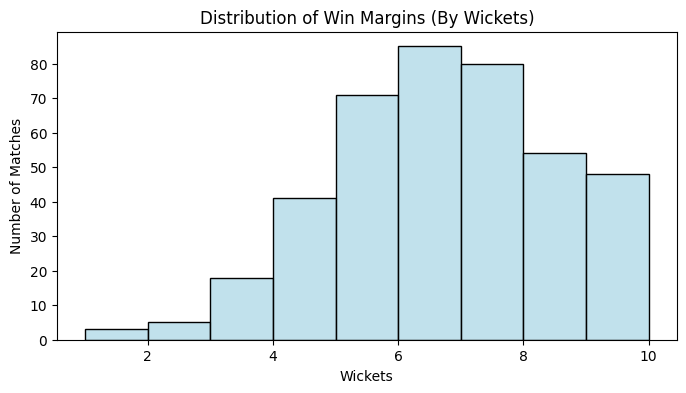

In [ ]:
#win margin by wickets
plt.figure(figsize=(8,4))
sns.histplot(df[df['win_by_wickets'] > 0]['win_by_wickets'], bins=9, kde=False, color='lightblue')
plt.title('Distribution of Win Margins (By Wickets)')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')
plt.show()


17)win margin by wickets

/tmp/ipython-input-35-854624518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='cubehelix')


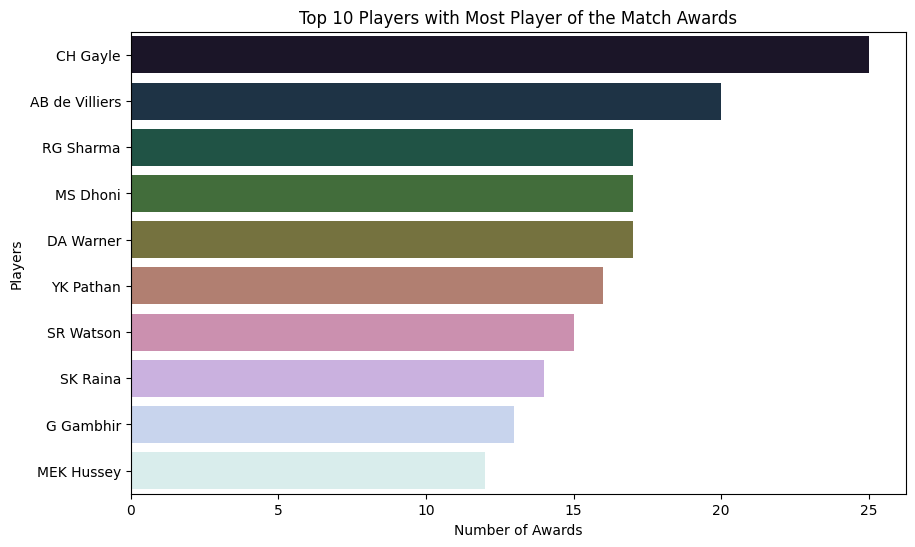

In [ ]:
#top player via mom
top_players = df['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_players.values, y=top_players.index, palette='cubehelix')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Players')
plt.show()


18)top player via mom

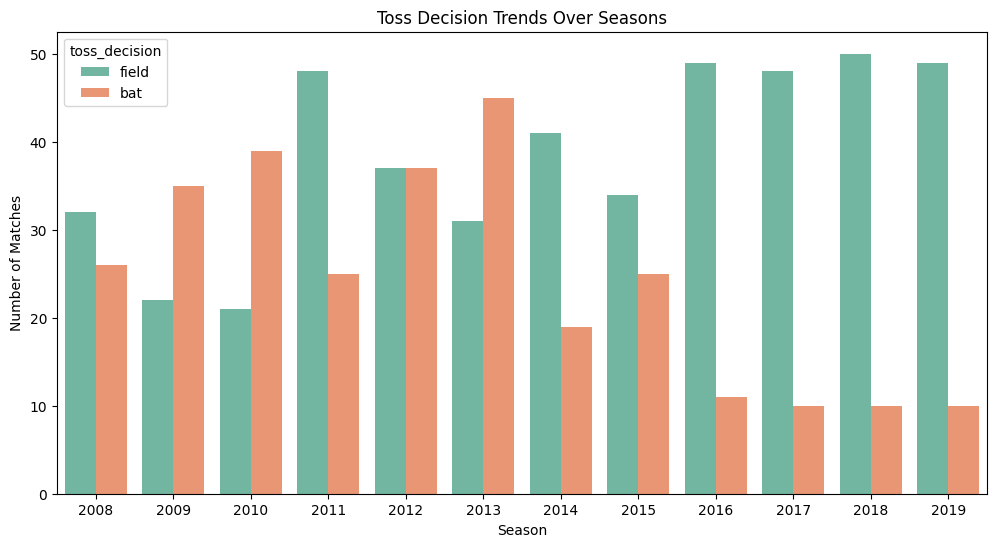

In [ ]:
#toss decisions
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df, palette='Set2')
plt.title('Toss Decision Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()


19)toss decisions across the years

In [ ]:
#avg win margin runs per team
df.groupby('winner')['win_by_runs'].mean().sort_values(ascending=False)


,win_by_runs
winner,
Chennai Super Kings,17.780000
Mumbai Indians,16.513274
Royal Challengers Bangalore,14.903614
Deccan Chargers,14.517241
Sunrisers Hyderabad,12.293103
Rajasthan Royals,11.933333
Kolkata Knight Riders,11.804348
Rising Pune Supergiant,11.733333
Pune Warriors,11.583333


20)avg win margin runs per team

In [ ]:
#avg win margin runs per team
df.groupby('winner')['win_by_wickets'].mean().sort_values(ascending=False)


,win_by_wickets
winner,
Kochi Tuskers Kerala,5.000000
Gujarat Lions,5.000000
Delhi Capitals,3.973684
Kolkata Knight Riders,3.815217
Royal Challengers Bangalore,3.783133
Rajasthan Royals,3.640000
Rising Pune Supergiant,3.400000
Punjab Kings,3.268293
Pune Warriors,3.000000


21)avg win margin runs per team

In [ ]:
# Number of times each team chose to bat/field after winning toss
df.groupby(['toss_winner', 'toss_decision']).size().unstack(fill_value=0)


toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,31,58
Gujarat Lions,1,14
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,30,62
Mumbai Indians,44,54
Pune Warriors,11,9
Punjab Kings,26,55


22)Number of times each team chose to bat/field after winning toss

In [ ]:
#Number of matches won by each team when batting first vs chasing
df.groupby(['winner', 'win_by_runs']).size()

winner               win_by_runs
Chennai Super Kings  0              48
                     1               1
                     2               2
                     3               1
                     4               1
                                    ..
Sunrisers Hyderabad  35              1
                     45              1
                     48              1
                     85              1
                     118             1
Length: 272, dtype: int64

23)Number of matches won by each team when batting first vs chasing

In [ ]:
df[df['dl_applied'] == 1]['season'].value_counts()


,count
season,
2016,4
2011,3
2018,3
2009,3
2015,2
2008,2
2017,1
2014,1


24)Number of matches where DL method applied per season

In [ ]:
df.groupby(['venue', 'winner']).size().nlargest(1)


,,0
venue,winner,
Eden Gardens,Kolkata Knight Riders,45


25)Team winning most matches at a single venue


In [ ]:
df.groupby(['season', 'player_of_match']).size().nlargest(1)


,,0
season,player_of_match,
2011,CH Gayle,7


26)Maximum Player of the Match awards in a single season

In [ ]:
#Segment-wise Analysis
df[['team1','team2','winner','win_by_runs']].sort_values('win_by_runs', ascending=False).head(3)


,team1,team2,winner,win_by_runs
43,Mumbai Indians,Delhi Capitals,Mumbai Indians,146
619,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144
59,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,140


27)Top 3 matches with biggest win by runs


In [ ]:
df[['win_by_runs','dl_applied']].corr()


,win_by_runs,dl_applied
win_by_runs,1.000000,-0.016458
dl_applied,-0.016458,1.000000


28)Correlation between win_by_runs and dl_applied (expect low but still good to test)

In [ ]:
fielding_first = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])]
fielding_first.shape[0]

258

29)Check if teams winning toss and fielding first win more frequently

In [ ]:
df[df['result'] != 'normal']['season'].value_counts()

,count
season,
2015,3
2019,3
2013,2
2017,1
2011,1
2010,1
2009,1
2014,1


30)Number of ties/no results per season — anomaly pattern


In [ ]:
# Correlation matrix
corr_matrix = df[['win_by_runs', 'win_by_wickets', 'dl_applied']].corr()
print(corr_matrix)


                win_by_runs  win_by_wickets  dl_applied
win_by_runs        1.000000       -0.561169   -0.016458
win_by_wickets    -0.561169        1.000000   -0.011936
dl_applied        -0.016458       -0.011936    1.000000


31)Correlation Matrix

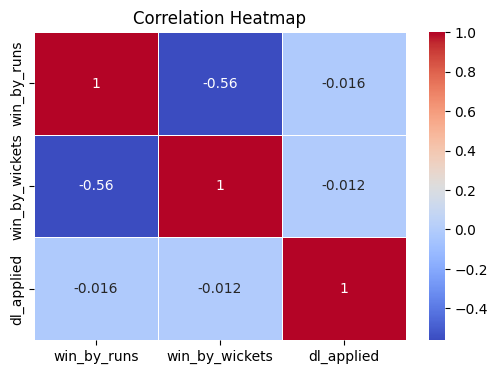

In [ ]:
# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


32)heatmap

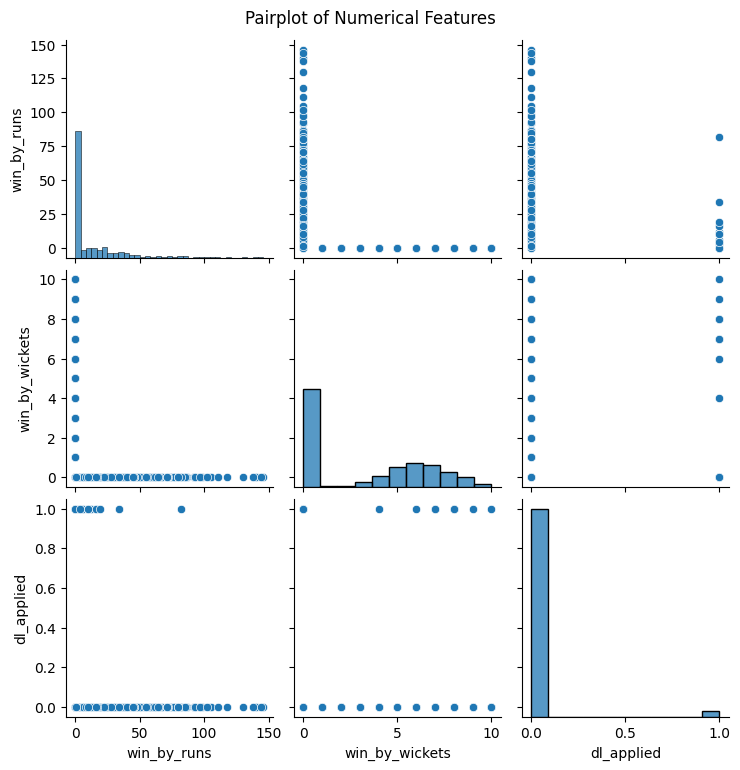

In [ ]:
sns.pairplot(df[['win_by_runs', 'win_by_wickets', 'dl_applied']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

33)pairplot